In [1]:
import os
import sys
import time
import socket
import random
import ok


# file_dir = os.path.dirname(os.path.realpath(__file__))
# parent_dir = os.path.dirname(file_dir)
# sys.path.append(parent_dir)
dev_info = ok.okTDeviceInfo()
print("------ PipeTest Application fot Python API ----------")
print("Front Panel API version: {}".format(ok.okCFrontPanel_GetAPIVersionString()))
dev = ok.okCFrontPanel()
error_code = dev.OpenBySerial("")
if error_code != 0:
    print('Could not open the device.')
    print(error_code)
    sys.exit(1)



def initialize_FPGA(dev: ok.okCFrontPanel, bit_file_path):
    dev.GetDeviceInfo(dev_info)
    print("Found device: {}".format(dev_info.productName))
    dev.LoadDefaultPLLConfiguration()
    print('Device firmware version: {}.{}'.format(dev_info.deviceMajorVersion, dev_info.deviceMinorVersion))
    print('Device serial number: {}'.format(dev_info.serialNumber))
    print('Device ID: {}'.format(dev_info.productID))
    print(f"loading {bit_file_path} as bit file")
    if (dev.ConfigureFPGA(bit_file_path) != ok.okCFrontPanel.NoError):
        print("Fpga configuration failed.")
        return False
    print("success configuration")
# initialize_FPGA(dev,"bitstreams/main_emulator.bit")
# initialize_FPGA(dev,"bitstreams/main_v7_clock_port_regfileonly.bit")
# initialize_FPGA(dev,"bitstreams/main_v8_fifo.bit")
# initialize_FPGA(dev,"bitstreams/main_v6.bit")
# initialize_FPGA(dev,"bitstreams/main_v13_v6.bit")
# initialize_FPGA(dev,"bitstreams/main_v13_v6_v2.bit")
# initialize_FPGA(dev,"bitstreams/main_v13_v6_v4.bit")
# initialize_FPGA(dev,"bitstreams/main_v13_regile.bit")
initialize_FPGA(dev,"bitstreams/main.bit")
# initialize_FPGA(dev,"bitstreams/main_v14.bit")

# initialize_FPGA(dev,"main_hardcoded.bit")

# ep_addr(8'h14), .ep_datain(ep20wireout));
# ep_addr(8'h15), .ep_datain(ep21wireout));
# ep_addr(8'h16), .ep_datain(ep22wireout));
# ep_addr(8'h18), .ep_datain(ep24wireout_readout));
# ep_addr(8'ha0), .ep_read(FIFO_read_from), .ep_blo



ep00wirein_address =  0x00
ep01wirein_address =  0x01
ep02wirein_address =  0x02
ep03wirein_address =  0x03
ep04wirein_address =  0x04
ep05wirein_address =  0x05
ep06wirein_address =  0x06
ep07wirein_address =  0x07
ep08wirein_address =  0x08
ep09wirein_address =  0x09
ep0awirein_address =  0x0A
ep0bwirein_address =  0x0B
ep0cwirein_address =  0x0C
ep0dwirein_address =  0x0D
ep0ewirein_address =  0x0E
ep0fwirein_address =  0x0F
ep10wirein_address =  0x10
ep11wirein_address =  0x11
ep12wirein_address =  0x12
ep13wirein_address =  0x13
ep14wirein_address =  0x14
ep15wirein_address =  0x15
ep16wirein_address =  0x16
ep17wirein_address =  0x17
ep18wirein_address =  0x18
ep19wirein_address =  0x19
ep1awirein_address =  0x1A
ep1bwirein_address =  0x1B              
ep1cwirein_address =  0x1C
ep1dwirein_address =  0x1D
ep1ewirein_address =  0x1E
ep1fwirein_address =  0x1F

# Trigger in endpoints
ep40trigin_address =  0x40
ep41trigin_address =  0x41

# wire out endpoints
ep20wireout_address = 0x20
ep21wireout_address = 0x21
ep22wireout_address = 0x22
ep23wireout_address = 0x23
ep24wireout_address = 0x24
ep25wireout_address = 0x25

ep3dwireout_address = 0x3D
ep3ewireout_address = 0x3E
ep3fwireout_address = 0x3F
# ep22wireout_address = 0x16
# ep24wireout_address = 0x18
epPipeOut_address   = 0xA0




# functions
def write_wr_in(dev,wr_addr,data,mask = 0xffffffff):
    dev.SetWireInValue(wr_addr, data,mask)
    dev.UpdateWireIns()  
def reset_sig(dev,ep_address):
    write_wr_in(dev,ep_address,0x00000001,mask=0x00000001)
    time.sleep(0.1)
    write_wr_in(dev,ep_address,0x00000000)
    time.sleep(0.1)
def write_length(dev,ep05wirein_address,length):
    write_wr_in(dev,ep05wirein_address,length)
    time.sleep(0.1)

def trigger_in(dev,trigin_address,index):
    dev.ActivateTriggerIn(trigin_address, index)

def trigger_spi(dev,trigin_address):
    dev.ActivateTriggerIn(trigin_address, 0)
    time.sleep(0.1)
def read_wire_out(dev,address):
    dev.UpdateWireOuts()
    ep20_val = dev.GetWireOutValue(address)
    return ep20_val
    # out_value = (ep20_val >> 8) & 0x7F  
    # out_debug = ep20_val & 0x7F
    # # print(f"Extracted ep{address}_val value: {ep20_val}")
    # # print(f"Extracted out value: {out_value}")
    # print(f"Extracted out_debug value: {out_debug}")
    # # return out_value, out_debug


def read_wire_out_print(dev, address, mode='dec'):
    dev.UpdateWireOuts()
    ep_val = dev.GetWireOutValue(address)
    if mode == 'hex':
        print(f"WireOut {hex(address)}: 0x{ep_val:04X}")
    else:  # default to decimal
        print(f"WireOut {hex(address)}: {ep_val}")
    return ep_val




# set_of_32 = 2
# length = 0x3F



# ep20wireout =    num_words_in_FIFO;
# ep21wireout =    { 16'b0, 12'b0, expander_ID_1, expander_detect, TTL_in_serial_exp, TTL_in_serial };
# ep22wireout =    { 16'b0, 15'b0, SPI_running };
# ep23wireout =    { 16'b0, TTL_in };
# ep24wireout =    { 16'b0, 14'b0, MMCM_prog_done, dataclk_locked };
# ep25wireout =    { 16'b0, 12'b0, board_mode };
# ep3ewireout =    { 16'b0, BOARD_ID };
# ep3fwireout =    { 16'b0, BOARD_VERSION };


def write_usb3_blocksize(dev,usb3_blocksize=0x00000000):
    write_wr_in(dev,ep1fwirein_address,usb3_blocksize)
    trigger_in(dev,ep40trigin_address,index=9)
def write_ddr_blocksize(dev,ddr_blocksize=0x00000000):
    write_wr_in(dev,ep1fwirein_address,ddr_blocksize)
    trigger_in(dev,ep40trigin_address,index=10)

def write_dataclk_MD(dev,Hex_00_M_D=0x00002A19):
    write_wr_in(dev,ep03wirein_address,Hex_00_M_D)
    trigger_in(dev,ep40trigin_address,index=0)      # MMCM_prog_trigger

def enable_streams(dev, enable_hex=0x00000000):
    write_wr_in(dev,ep14wirein_address,enable_hex) 

def write_DSP_settle_en(dev,Hex=0x00000000):
    write_wr_in(dev,ep1fwirein_address,Hex)
    trigger_in(dev,ep40trigin_address,index=6)  
    # trigger_in(dev,ep40trigin_address,index=7)      # MMCM_prog_trigger

def write_DAC_set_zero(dev):
    write_wr_in(dev,ep1fwirein_address,0x00000000)
    for i in range(32):
        trigger_in(dev,ep40trigin_address,index=i)  

def write_delay(dev,delay=0x00000001):
    write_wr_in(dev,ep04wirein_address,delay,mask=0x0000000f)

def write_max_time_samples(dev,time_step=0x00000100):
    print(f"Writing time step: {time_step}")
    write_wr_in(dev,ep01wirein_address,time_step)

def dac_stuff(dev):
    write_wr_in(dev,ep08wirein_address,0x00000000) 
    write_wr_in(dev,ep09wirein_address,0x00000000) 
    write_wr_in(dev,ep0awirein_address,0x00000000) 
    write_wr_in(dev,ep0bwirein_address,0x00000000) 
    write_wr_in(dev,ep0cwirein_address,0x00000000) 
    write_wr_in(    dev,ep15wirein_address,0x00000000) 
    write_wr_in(    dev,ep16wirein_address,0x00000000) 
    write_wr_in(    dev,ep17wirein_address,0x00000000) 
    write_wr_in(    dev,ep18wirein_address,0x00000000) 
    write_wr_in(    dev,ep19wirein_address,0x00000000) 
    write_wr_in(    dev,ep1awirein_address,0x00000000) 
    write_wr_in(    dev,ep1bwirein_address,0x00000000) 
    write_wr_in(    dev,ep1cwirein_address,0x00000000) 
    write_wr_in(    dev,ep1dwirein_address,0x00000000) 
    write_wr_in(    dev,ep1ewirein_address,0x00000000) 


def mux_emulator_type(dev,external_emulator=False,hardcoded=False):
    value_send = 0x00000000
    if external_emulator:
        value_send = value_send | 0x00000002
    if hardcoded:
        value_send = value_send | 0x00000001
    write_wr_in(dev,ep0fwirein_address,value_send)
    # trigger_in(dev,ep40trigin_address,index=10)



def rst_emulator(dev):
    # value_send = 
    write_wr_in(dev,ep0fwirein_address,0x00000004)
    # trigger_in(dev,ep40trigin_address,index=10)



# write_out wires status
# read_wire_out_print(dev, ep20wireout_address, mode='hex')
# read_wire_out_print(dev, ep21wireout_address, mode='hex')
# read_wire_out_print(dev, ep22wireout_address, mode='hex')
# read_wire_out_print(dev, ep23wireout_address, mode='hex')
# read_wire_out_print(dev, ep24wireout_address, mode='hex')
# read_wire_out_print(dev, ep25wireout_address, mode='hex')
# read_wire_out_print(dev, ep3ewireout_address, mode='hex')
# read_wire_out_print(dev, ep3ewireout_address, mode='dec')
read_wire_out_print(dev, ep3fwireout_address, mode='hex')
read_wire_out_print(dev, ep3fwireout_address, mode='dec')


print("FPGA is ready, starting INTAN configuration...")
#Trigger_in40 
reset_sig(              dev,    ep00wirein_address)
print("Reset done")
write_usb3_blocksize(   dev,    usb3_blocksize=0x00000000)
write_ddr_blocksize(    dev,    ddr_blocksize =0x00000000) 
write_dataclk_MD(       dev,    Hex_00_M_D    =0x00002A19) #
while (read_wire_out_print(dev, ep24wireout_address, mode='hex') != 0x00000003):
    print("Waiting for FPGA to be ready...")
    # time.sleep(0.5)


# DAC off, not used in this version
dac_stuff(dev)
write_DSP_settle_en(dev)
write_DAC_set_zero(dev)



print("Enabling streams...")
enable_streams( dev, enable_hex=0x0000000F)


write_delay(dev,delay=0x00000002)
write_max_time_samples(dev,time_step=0x00000010)
# mux_emulator_type(dev,external_emulator=True,hardcoded=False)
mux_emulator_type(dev,external_emulator=False,hardcoded=False)
# mux_emulator_type(dev,external_emulator=False,hardcoded=True)


dev.ActivateTriggerIn(ep41trigin_address, 0)
# ep41trigin
print(f" Final EP00 wireout value: {read_wire_out_print(dev, ep00wirein_address, mode='hex')}")
print("FPGA configuration done, starting data acquisition...")
read_wire_out_print(dev, ep20wireout_address, mode='dec')
read_wire_out_print(dev, ep20wireout_address, mode='dec')
read_wire_out_print(dev, ep20wireout_address, mode='dec')
read_wire_out_print(dev, ep20wireout_address, mode='dec')
read_wire_out_print(dev, ep20wireout_address, mode='dec')



read_wire_out_print(dev, ep20wireout_address, mode='dec')
print("Data acquisition done.")

time.sleep(1)



import time

ep_addr = 0xA0  # Replace with your actual PipeOut endpoint address
ep20wireout_address = 0x20  # Replace with your actual WireOut address
chunk_size = 128  # Number of bytes to read per chunk
output_file = 'output_emulator_v14_2.txt'  # Output file path
counts_max = 2340
counts  = 0
with open(output_file, 'w') as f:
    while True:
        # Update and read the WireOut value to determine bytes left
        dev.UpdateWireOuts()
        bytes_left = dev.GetWireOutValue(ep20wireout_address)
        print(f"WireOut {hex(ep20wireout_address)}: {bytes_left} bytes left")

        # Check if the remaining bytes are less than the chunk size
        if bytes_left < chunk_size:
            print(f"Final read: only {bytes_left} bytes left, which is less than the chunk size ({chunk_size} bytes).")
            break

        print(f"Reading {chunk_size} bytes from PipeOut endpoint {hex(ep_addr)}...")
        data = bytearray(chunk_size)
        ret = dev.ReadFromBlockPipeOut(ep_addr, chunk_size, data)

        if ret < 0:
            print(f"Error reading from Block Pipe Out. Error code: {ret}")
            break

        print("Data acquisition done.")

        for i in range(0, len(data), 4):
            chunk = data[i:i+4]
            if len(chunk) < 4:
                print("Incomplete 4-byte chunk encountered; skipping.")
                continue
            value = int.from_bytes(chunk, byteorder='little')  # Adjust 'little' or 'big' as needed
            # value = int.from_bytes(chunk, byteorder='big')  # Adjust 'little' or 'big' as needed
            line = f"0x{value:08X}"
            # line = f"Index {i//4:05d}: 0x{value:08X}"
            # print(line)
            if counts < counts_max: 
                f.write(line + '\n')
            counts += 1

        # time.sleep(0.1)  # Optional: add delay between reads








------ PipeTest Application fot Python API ----------
Front Panel API version: 5.3.5
Found device: XEM7310-A200
Device firmware version: 1.30
Device serial number: 2436001CQA
Device ID: 44
loading bitstreams/main.bit as bit file
success configuration
WireOut 0x3f: 0x0001
WireOut 0x3f: 1
FPGA is ready, starting INTAN configuration...
Reset done
WireOut 0x24: 0x0003
Enabling streams...
Writing time step: 16
WireOut 0x0: 0x0000
 Final EP00 wireout value: 0
FPGA configuration done, starting data acquisition...
WireOut 0x20: 4992
WireOut 0x20: 4992
WireOut 0x20: 4992
WireOut 0x20: 4992
WireOut 0x20: 4992
WireOut 0x20: 4992
Data acquisition done.
WireOut 0x20: 4992 bytes left
Reading 128 bytes from PipeOut endpoint 0xa0...
Data acquisition done.
WireOut 0x20: 4928 bytes left
Reading 128 bytes from PipeOut endpoint 0xa0...
Data acquisition done.
WireOut 0x20: 4864 bytes left
Reading 128 bytes from PipeOut endpoint 0xa0...
Data acquisition done.
WireOut 0x20: 4800 bytes left
Reading 128 bytes 

Number of Time entries 15
Number of entries in frame  156
Timestamp: 2
MISO data entries: [0, 32, 64, 96, 0, 32, 64, 96, 0, 32, 64, 96, 0, 32, 64, 96, 1, 33, 65, 97, 2, 34, 66, 98, 3, 35, 67, 99, 4, 36, 68, 100, 5, 37, 69, 101, 6, 38, 70, 102, 7, 39, 71, 103, 8, 40, 72, 104, 9, 41, 73, 105, 10, 42, 74, 106, 11, 43, 75, 107, 12, 44, 76, 108, 13, 45, 77, 109, 14, 46, 78, 110, 15, 47, 79, 111, 16, 48, 80, 112, 17, 49, 81, 113, 18, 50, 82, 114, 19, 51, 83, 115, 20, 52, 84, 116, 21, 53, 85, 117, 22, 54, 86, 118, 23, 55, 87, 119, 24, 56, 88, 120, 25, 57, 89, 121, 26, 58, 90, 122, 27, 59, 91, 123, 28, 60, 92, 124, 29, 61, 93, 125, 30, 62, 94, 126, 31, 63, 95, 127]
Len MISO data entries: 140
Number of Filler Words: 10
Number of timestamps: 15
Shape of channel data: 15 x 128
Shape of aux data: 15 x 12

Checking channel alignment...
Done Checking channel alignment
Channel data is aligned!



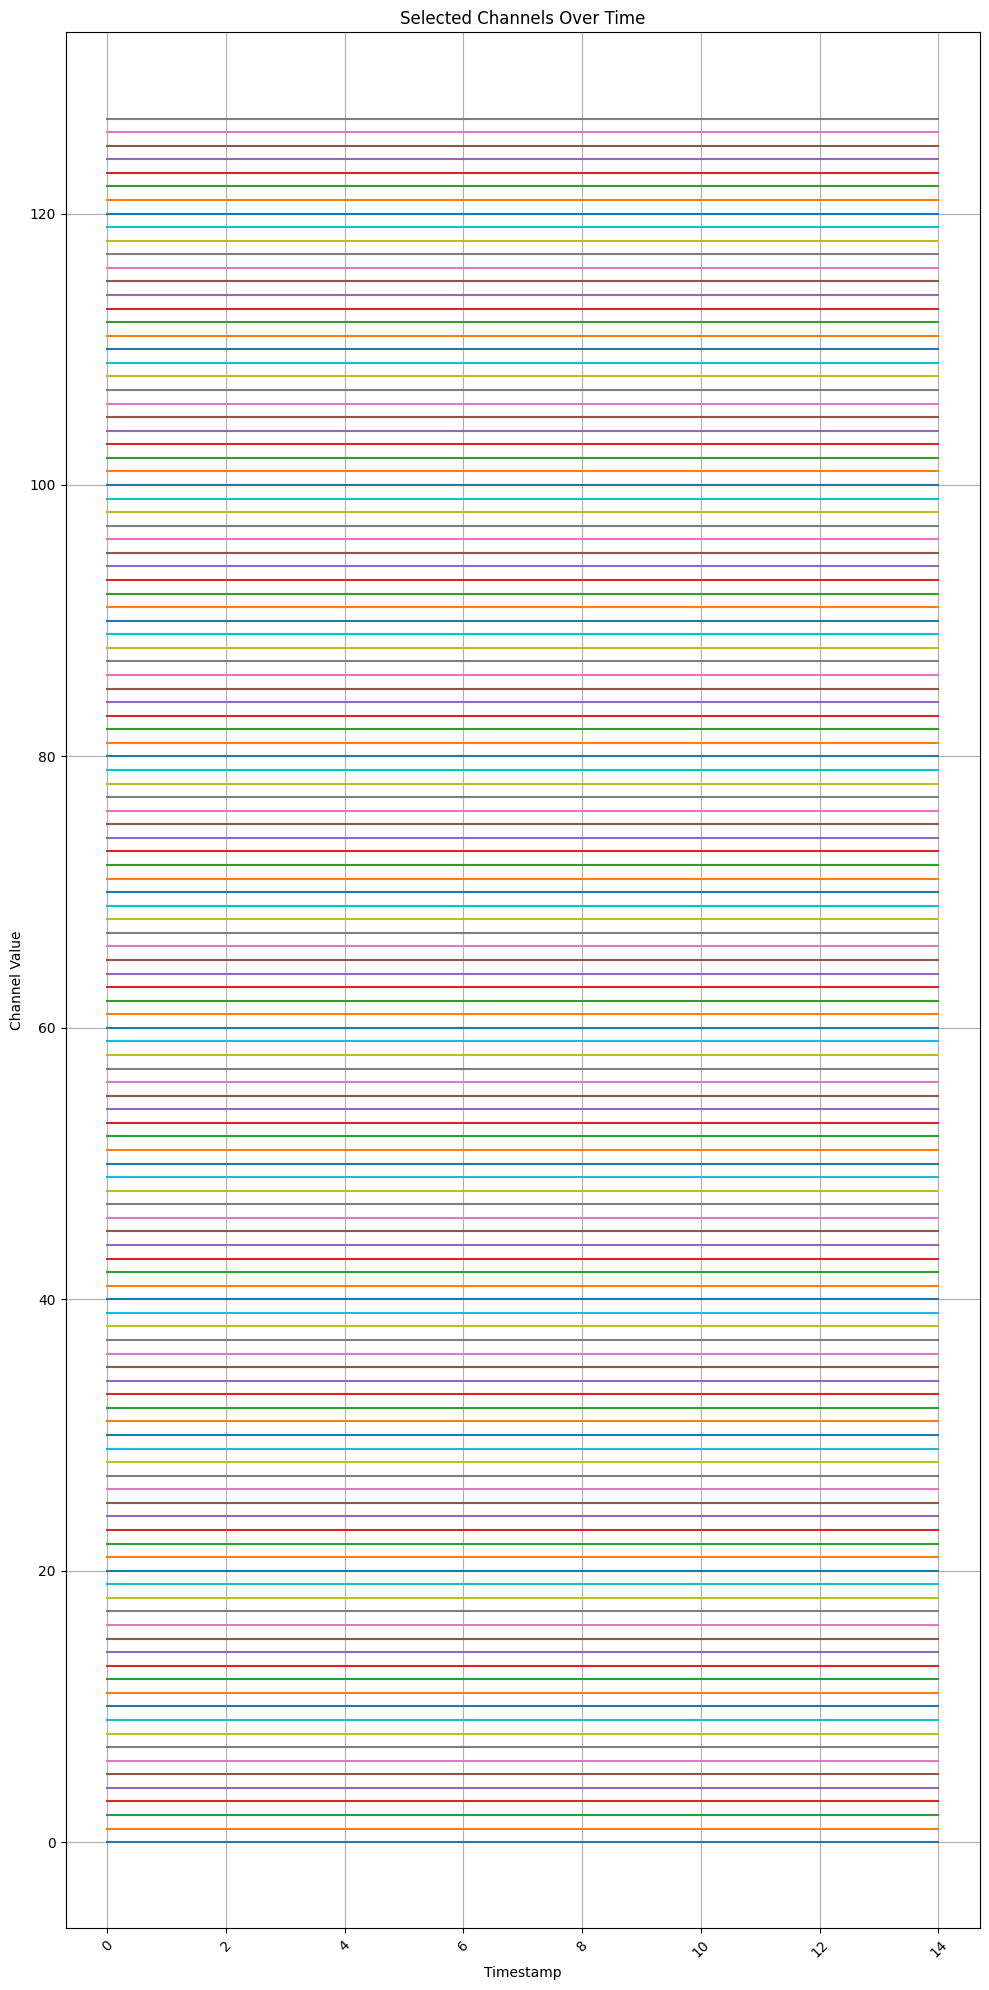

In [2]:
def parse_data_frames(file_path, num_data_streams):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    # data = [int(line.strip(), 16) for line in lines if line.strip()]
    data = [(int(line.strip(), 16) >> 16) & 0xFFFF for line in lines if line.strip()]
    # print([f"0x{w:04X}" for w in data[:50]])  # Print first 50 words in hex
    magic_sequence = [0x2A53, 0x3813, 0x2AAA, 0xD7A2]
    magic_len = len(magic_sequence)
    groups = []
    current_group = []
    i = 0
    while i < len(data):
        if data[i:i+magic_len] == magic_sequence:
            if current_group:
                groups.append(current_group)
            current_group = magic_sequence.copy()
            i += magic_len
        else:
            current_group.append(data[i])
            i += 1
    if current_group:
        groups.append(current_group)

    print("Number of Time entries",len(groups))
    print("Number of entries in frame ",len(groups[0]))
    # print([f"0x{w:04X}" for w in groups[0]])  # Print first 50 words in hex
    return groups

def parse_single_frame(frame, num_data_streams):
    """
    Parses a single frame into header, timestamp (32-bit), MISO data, ADC results, and TTL IO.

    frame: list of 16-bit integers
    num_data_streams: int, number of enabled data streams (1-32)
    """
    magic_sequence = [0x2A53, 0x3813, 0x2AAA, 0xD7A2]
    
    # Validate magic sequence
    if frame[:4] != magic_sequence:
        raise ValueError("Frame does not start with correct magic sequence!")
    
    # Timestamp is made from 5th and 6th entries
    timestamp_low  = frame[4]
    timestamp_high = frame[5]
    timestamp = (timestamp_high << 16) | timestamp_low
    # Start parsing after magic + timestamp
    idx = 6
    
    # Parse MISO data
    miso_entries_per_stream = 35  # 35 samples per data stream
    total_miso_entries = num_data_streams * miso_entries_per_stream
    miso_data =  frame[idx : idx + total_miso_entries]
    idx += total_miso_entries
    # Optional: parse filler words (skip 0-3 words if zeros)
    filler_words = 0
    while idx < len(frame) and frame[idx] == 0x0000:
        filler_words += 1
        idx += 1
    # print(f"Number of filler words: {filler_words}")
    # adc_results = frame[idx : idx + 8]
    # idx += 8
    # ttl_input =  frame[idx] if idx < len(frame) else None
    # ttl_output = frame[idx+1] if idx+1 < len(frame) else None
    # Package result
    parsed = {
        'timestamp': timestamp,
        'miso_data': miso_data,
        'filler_words': filler_words
    }
    return parsed



# def build_channel_aux_timestamp_arrays(frames, num_data_streams=4):
#     """
#     Parses multiple frames into timestamp array, channel array, and aux output array.

#     frames: list of frames (each a list of 16-bit integers)
#     num_data_streams: how many streams were enabled (default 4)
#     """
#     timestamps = []
#     channel_data = []  # List of [128 channels]
#     aux_data = []      # List of [12 aux values]

#     for frame in frames:
#         parsed = parse_single_frame(frame, num_data_streams)

#         timestamps.append(parsed['timestamp'])

#         miso_data = parsed['miso_data']
        
#         # Now parse miso_data into 4 sets
#         frame_channels = []
#         frame_aux = []

#         idx = 0
#         for stream in range(num_data_streams):
#             # Extract 3 aux outputs
#             aux_outputs = miso_data[idx:idx+3]
#             frame_aux.extend(aux_outputs)
#             idx += 3

#             # Extract 32 channels
#             channels = miso_data[idx:idx+32]
#             frame_channels.extend(channels)
#             idx += 32

#         # Each frame now yields:
#         # - 12 aux entries (3 * 4)
#         # - 128 channel entries (32 * 4)

#         channel_data.append(frame_channels)
#         aux_data.append(frame_aux)

#     return timestamps, channel_data, aux_data

def build_channel_aux_timestamp_arrays(frames, num_data_streams=4):
    """
    Parses multiple frames into timestamp array, channel array, and aux output array
    following the corrected interleaved format.
    """
    timestamps = []
    channel_data = []  # List of [128 channels]
    aux_data = []      # List of [12 aux values]

    for frame in frames:
        parsed = parse_single_frame(frame, num_data_streams)

        timestamps.append(parsed['timestamp'])
        miso_data = parsed['miso_data']

        frame_channels = [0] * (32 * num_data_streams)  # 128 channels
        frame_aux = [0] * (3 * num_data_streams)         # 12 aux outputs

        # Now step through 35 entries (each entry has 4 streams)
        idx = 0
        for sample_num in range(35):
            for stream_num in range(num_data_streams):
                value = miso_data[idx]
                idx += 1

                if sample_num < 3:
                    # First 3 samples are AUX data
                    aux_index = sample_num * num_data_streams + stream_num
                    frame_aux[aux_index] = value
                else:
                    # Remaining samples are Channel data
                    ch_index = (sample_num - 3) + (stream_num * 32)
                    frame_channels[ch_index] = value

        channel_data.append(frame_channels)
        aux_data.append(frame_aux)

    return timestamps, channel_data, aux_data



import matplotlib.pyplot as plt

def plot_selected_channels(timestamps, channel_data, channels_to_plot=None,emulator=False):
    """
    Plots selected channels over time. 
    If channels_to_plot is None or 'all', plots all available channels.

    timestamps: list of timestamps (length = num_frames)
    channel_data: list of lists, each with 128 channel values
    channels_to_plot: list of integers (channel indices to plot, 0 to 127) or None/'all'
    """
    num_frames = len(timestamps)

    # Make sure timestamps and data align
    assert len(channel_data) == num_frames, "Mismatch between timestamps and channel data!"

    # Build x-axis
    x = timestamps

    # If channels_to_plot is None or 'all', plot all channels
    if channels_to_plot is None or channels_to_plot == 'all':
        channels_to_plot = list(range(len(channel_data[0])))
    plt.figure(figsize=(10, 20))
    i = []
    # For each channel to plot
    for ch in channels_to_plot:
        if ch < 0 or ch >= len(channel_data[0]):
            print(f"Warning: Channel {ch} out of range. Skipping.")
            continue

        # y-axis: extract this channel across all frames
        y = [frame[ch] for frame in channel_data]
        
        # print(f"Channel {ch} data: {y[-1:]}")  # Print last value for quick check
        i.append([ch, y[-1:][0]])
        plt.plot(x, y, label=f'Channel {ch}')
    if emulator:
        print("")
        print("Checking channel alignment...")
        NO_PROBLEM = False
        for ie in i:
            if ie[1] != ie[0]:
                print(f"Channel MISSALIGHNMENT {ie[0]}: {ie[1]}")
                NO_PROBLEM = True
        if NO_PROBLEM:  
            print("Channel data is not aligned!")
        else:
            print("Done Checking channel alignment")
            print("Channel data is aligned!")
        print("")

    # print(i)
    plt.xlabel('Timestamp')
    plt.ylabel('Channel Value')
    plt.title('Selected Channels Over Time')
    # plt.legend()
    # plt.ylim(-32768, 32767)  # Assuming signed 16-bit values
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()


# Example usage:
# a =  parse_data_frames("output_emulator_v8.txt", 4)
# a =  parse_data_frames("output_emulator_v14.txt", 4)
a =  parse_data_frames("output_emulator_v14_2.txt", 4)
# a =  parse_data_frames("output_emulator_v6_1.txt", 4)

# a = parse_data_frames("output_hardcoded.txt", 4)
parsed = parse_single_frame(a[2], num_data_streams=4)
print("Timestamp:",                 parsed['timestamp'])
print("MISO data entries:",         parsed['miso_data'])
print("Len MISO data entries:", len(parsed['miso_data']))
print("Number of Filler Words:",    parsed['filler_words'])
timestamps, channel_data, aux_data = build_channel_aux_timestamp_arrays(a, num_data_streams=4)

print("Number of timestamps:", len(timestamps))
print("Shape of channel data:", len(channel_data), "x", len(channel_data[0]))
print("Shape of aux data:", len(aux_data), "x", len(aux_data[0]))

channels_to_plot = [0, 1, 2, 3]  # You can customize this
channels_to_plot = [2, 3, 4, 5]  # You can customize this

# plot_selected_channels(timestamps, channel_data, channels_to_plot)
plot_selected_channels(timestamps, channel_data, channels_to_plot='all',emulator=True)

